<a href="https://colab.research.google.com/github/estefaniis/Projects/blob/main/BostonHousePrices_SantiagoGatica_Estefani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5 - Final Project: Boston House Prices
---

- Your Name Here: Estefani Santiago Gatica
- WFU Email Address:sante23@gmail.com
- Submission Date:08/18/2023

# 1. Import Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --------------------------------
# Suppress scientific notation in the notebook for pandas DataFrame
pd.set_option('display.float_format', '{:.4f}'.format)


In [ ]:
boston = pd.read_csv('/content/boston-1.csv')
zip = pd.read_csv('/content/zips.csv')
pred1 = pd.read_csv('/content/model1_predictions-1.csv')
pred2 = pd.read_csv('/content/model2_predictions-1.csv')

In [ ]:
boston.head()

,pid,zipcode,own_occ,land_sf,yr_built,yr_remod,living_area,num_floors,structure_class,r_bldg_styl,...,r_ovrall_cnd,r_int_cnd,r_int_fin,r_view,zip,population,pop_density,median_income,city_state,av_total
0,10,2136,Y,10288.0000,1992,0.0000,1681,1.0000,R,RR,...,A,A,N,A,2136,28488,6207,58890,"Hyde Park, MA",321200.0000
1,20,2132,Y,10148.0000,1900,2016.0000,3024,2.5000,R,CL,...,G,G,N,G,2132,36314,13251,75446,"Cambridge, MA",845475.9346
2,30,2132,Y,8512.0000,1920,0.0000,1160,2.0000,R,CL,...,A,A,N,A,2132,36314,13251,75446,"Cambridge, MA",401230.0313
3,40,2124,Y,3187.0000,1900,2001.0000,1868,2.0000,R,CL,...,G,A,N,F,2124,47783,15913,48841,"Dorchester Center, MA",450500.0000
4,50,2136,Y,10088.0000,1971,1975.0000,1534,1.0000,R,RR,...,A,A,N,G,2136,28488,6207,58890,"Hyde Park, MA",368094.7401


In [ ]:
zip.head()

,ZIP,Population,Pop_Density,Median_Income,City_State
0,2132,36314,13251,75446,"Cambridge, MA"
1,2124,47783,15913,48841,"Dorchester Center, MA"
2,2131,29826,11505,66735,"Roslindale, MA"
3,2136,28488,6207,58890,"Hyde Park, MA"
4,2130,35401,10618,75730,"Jamaica Plain, MA"


# 2. Explore/Clean Data

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14225 non-null  int64  
 1   zipcode          14225 non-null  int64  
 2   own_occ          14225 non-null  object 
 3   land_sf          14221 non-null  float64
 4   yr_built         14225 non-null  int64  
 5   yr_remod         13714 non-null  float64
 6   living_area      14225 non-null  int64  
 7   num_floors       14225 non-null  float64
 8   structure_class  14225 non-null  object 
 9   r_bldg_styl      14225 non-null  object 
 10  r_roof_typ       14225 non-null  object 
 11  r_ext_fin        14225 non-null  object 
 12  r_total_rms      14225 non-null  int64  
 13  r_bdrms          14225 non-null  int64  
 14  r_full_bth       14225 non-null  int64  
 15  r_half_bth       14225 non-null  int64  
 16  r_bth_style      14225 non-null  object 
 17  r_kitch     

There are some null values in two columns

In [ ]:
boston['yr_remod'] = boston['yr_remod'].replace(np.nan, 0.0)
#for null values because of assumption that it is not applicable
#cannot do that for sqft -- ??

In [ ]:
boston.isnull().sum()/boston.shape[0]

pid               0.0000
zipcode           0.0000
own_occ           0.0000
land_sf           0.0003
yr_built          0.0000
yr_remod          0.0000
living_area       0.0000
num_floors        0.0000
structure_class   0.0000
r_bldg_styl       0.0000
r_roof_typ        0.0000
r_ext_fin         0.0000
r_total_rms       0.0000
r_bdrms           0.0000
r_full_bth        0.0000
r_half_bth        0.0000
r_bth_style       0.0000
r_kitch           0.0000
r_kitch_style     0.0000
r_heat_typ        0.0000
r_ac              0.0000
r_fplace          0.0000
r_ext_cnd         0.0000
r_ovrall_cnd      0.0000
r_int_cnd         0.0000
r_int_fin         0.0000
r_view            0.0000
zip               0.0000
population        0.0000
pop_density       0.0000
median_income     0.0000
city_state        0.0000
av_total          0.0000
dtype: float64

In [ ]:
boston.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pid,14225.0000,71130.0000,41065.4812,10.0000,35570.0000,71130.0000,106690.0000,142250.0000
zipcode,14225.0000,2131.4164,3.6961,2124.0000,2131.0000,2132.0000,2132.0000,2136.0000
land_sf,14221.0000,5910.2521,2868.8400,0.0000,4305.0000,5291.0000,6731.0000,107158.0000
yr_built,14225.0000,1933.4266,33.6072,0.0000,1910.0000,1931.0000,1955.0000,2016.0000
yr_remod,14225.0000,655.0789,939.1863,0.0000,0.0000,0.0000,1995.0000,2016.0000
living_area,14225.0000,1658.3717,547.5546,332.0000,1300.0000,1552.0000,1906.0000,8623.0000
num_floors,14225.0000,1.7271,0.4471,1.0000,1.5000,2.0000,2.0000,3.0000
r_total_rms,14225.0000,7.0974,1.5546,3.0000,6.0000,7.0000,8.0000,18.0000
r_bdrms,14225.0000,3.3336,0.9184,0.0000,3.0000,3.0000,4.0000,9.0000
r_full_bth,14225.0000,1.3437,0.5577,1.0000,1.0000,1.0000,2.0000,6.0000


# 3. Univariate Analysis

In [ ]:
#identify numeric columns
numeric_cols = boston.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['pid', 'zipcode', 'land_sf', 'yr_built', 'yr_remod', 'living_area',
       'num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       'r_kitch', 'r_fplace', 'zip', 'population', 'pop_density',
       'median_income', 'av_total'],
      dtype='object')

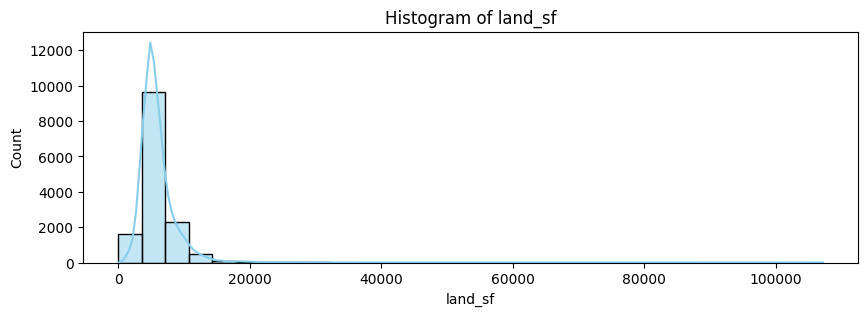

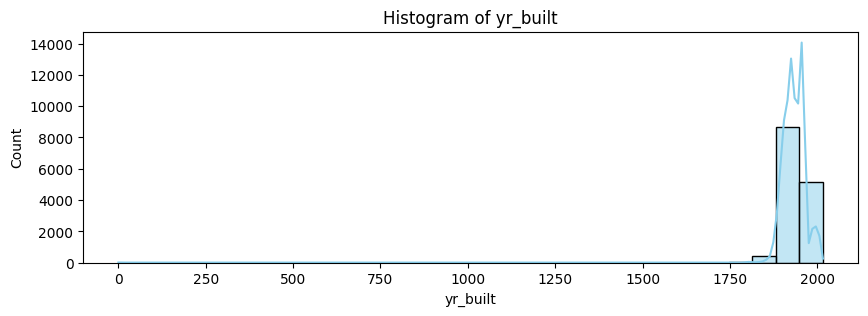

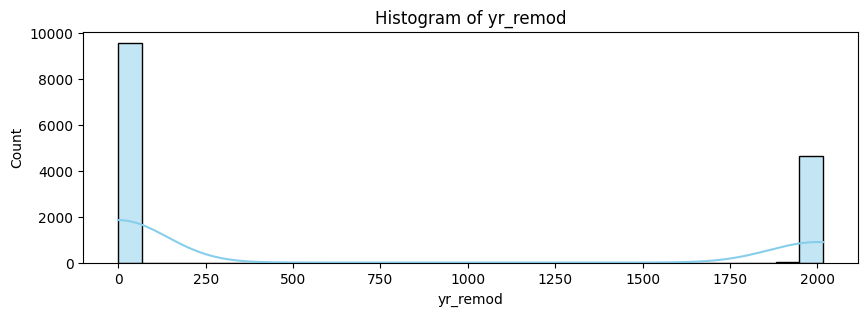

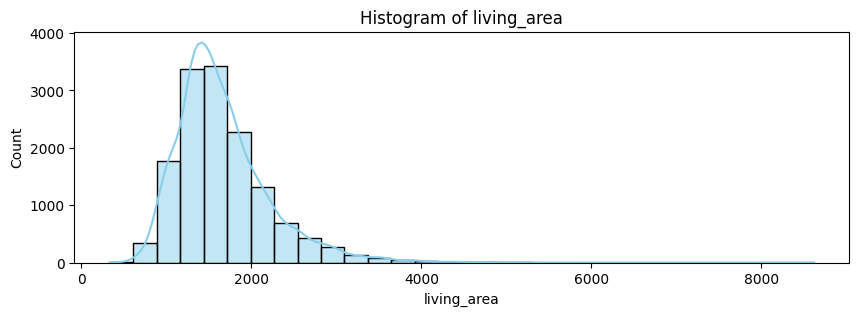

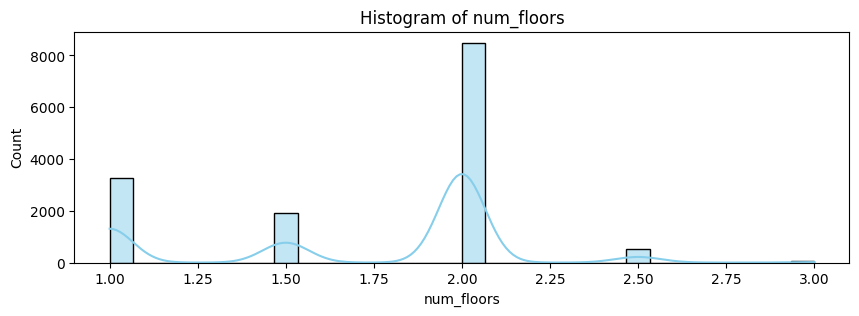

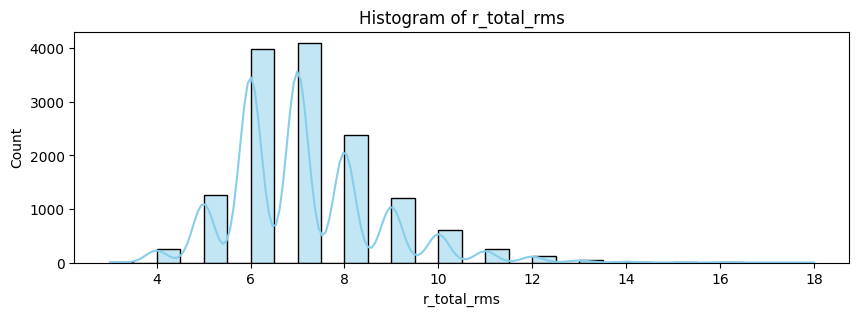

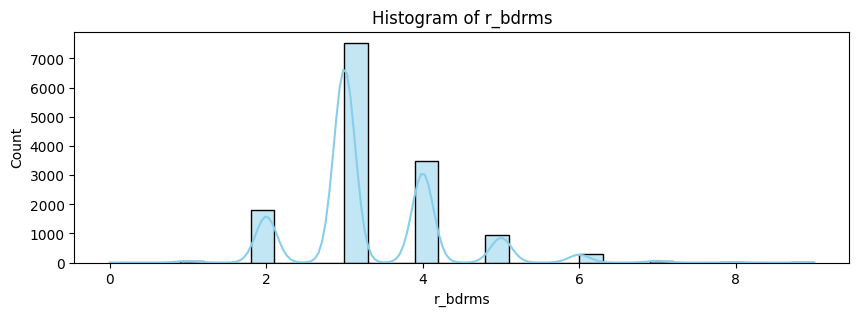

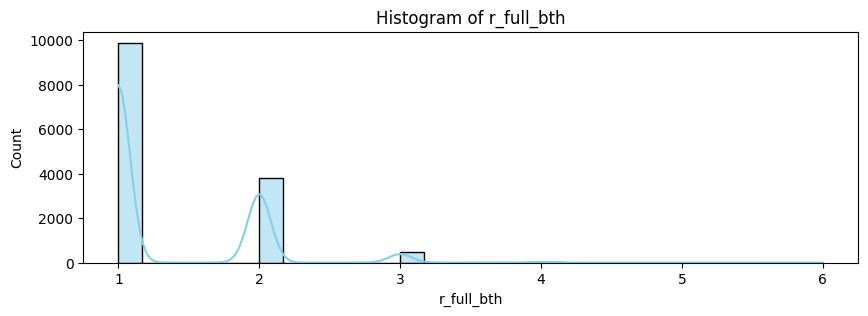

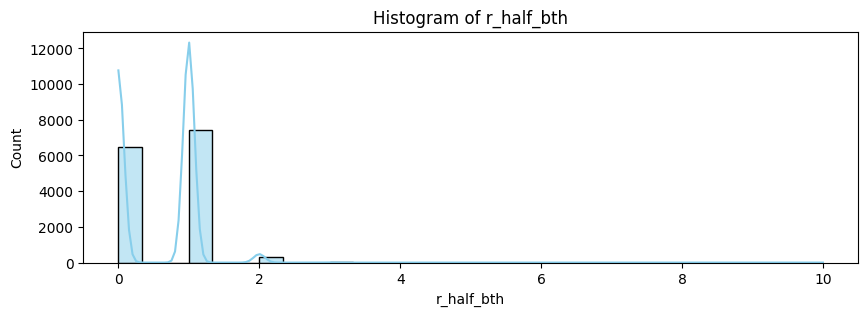

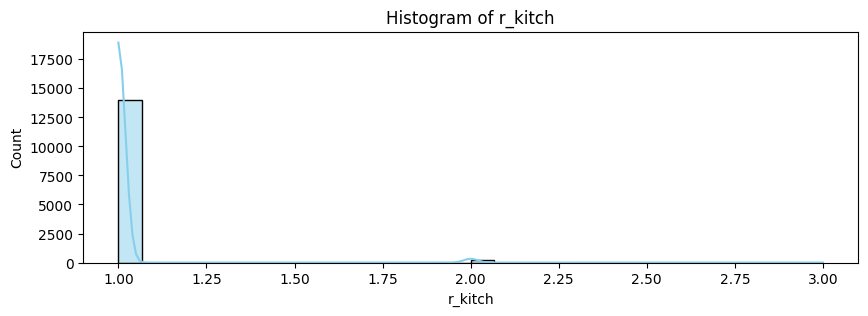

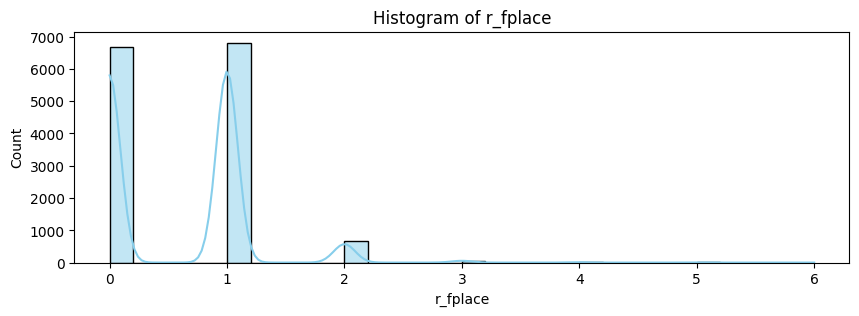

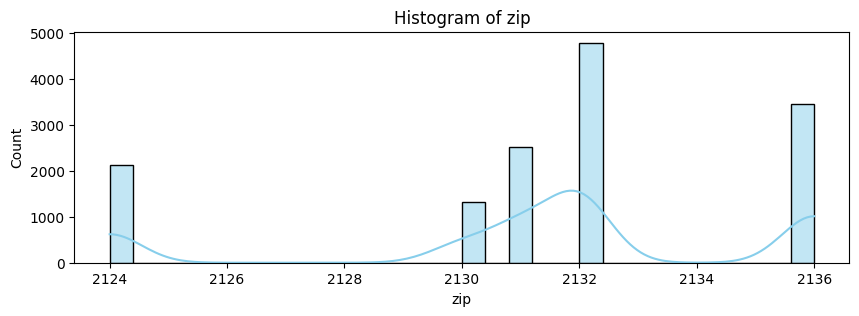

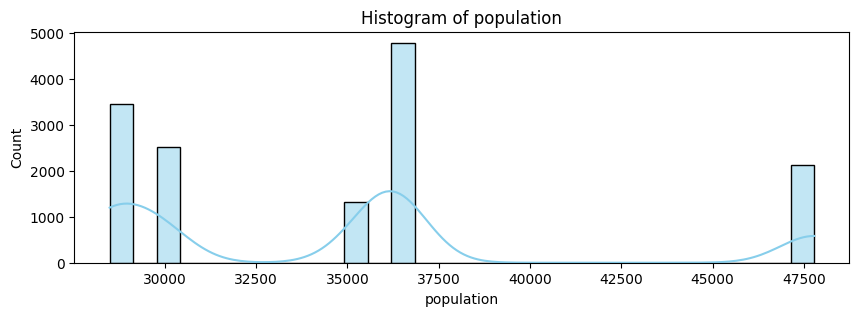

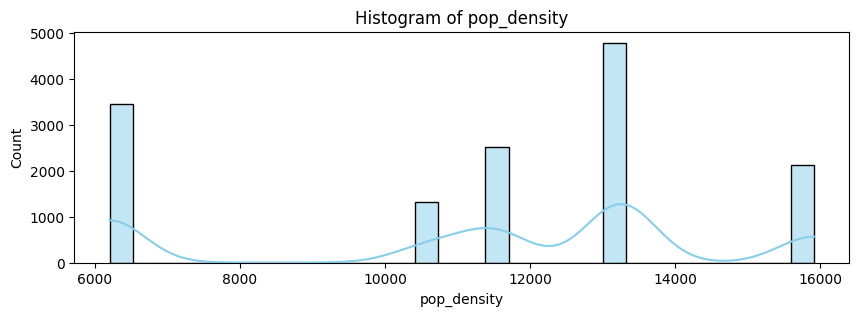

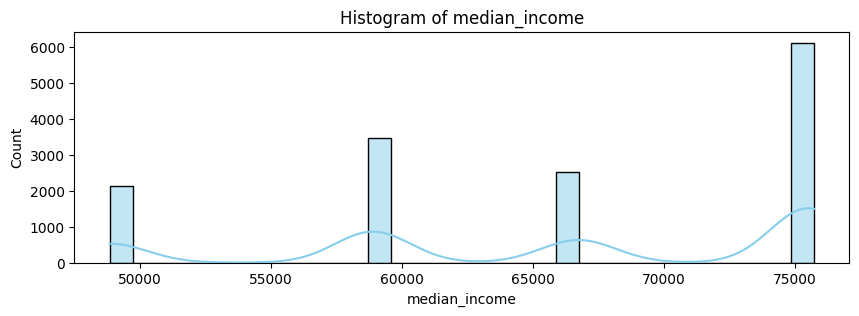

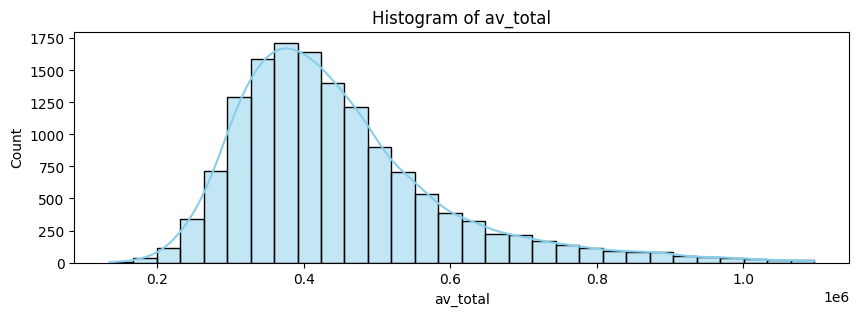

In [ ]:
numeric_feats = ['land_sf', 'yr_built', 'yr_remod', 'living_area',
       'num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth',
       'r_kitch', 'r_fplace', 'zip', 'population', 'pop_density',
       'median_income', 'av_total']
#create for loop to produce graph for each numeric feat
for feature in numeric_feats:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(boston,x=feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

Histograms of numerical values where all are pretty skewed - lets look at the outliers pulling that skew by doing a box plot

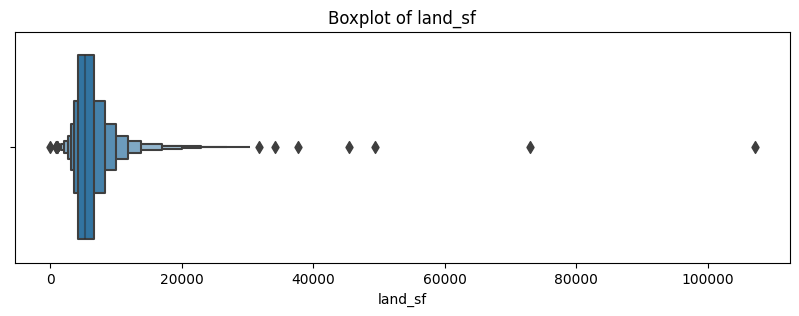

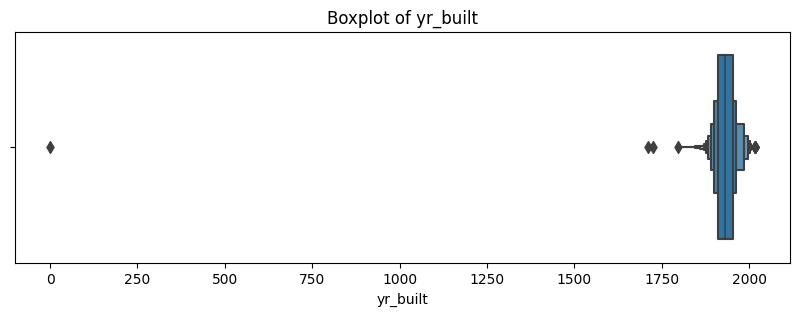

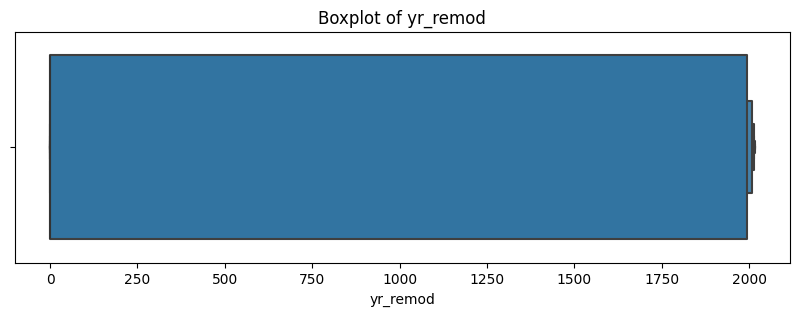

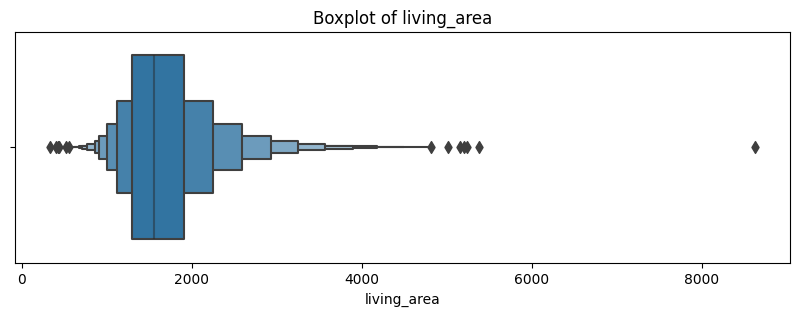

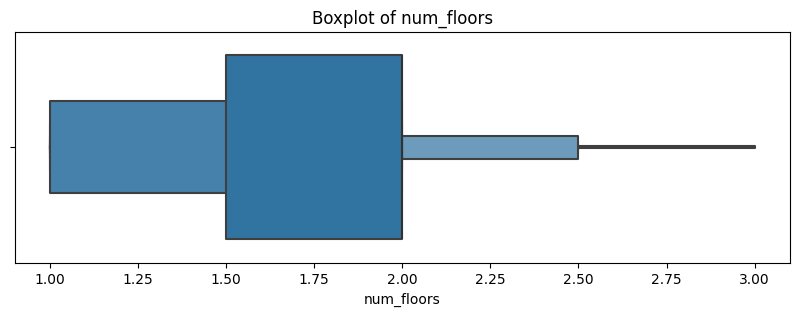

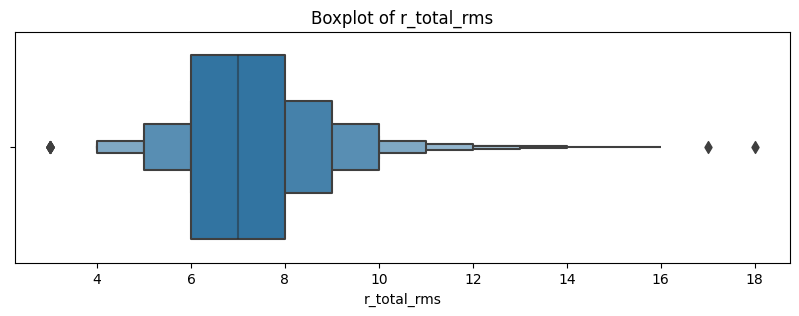

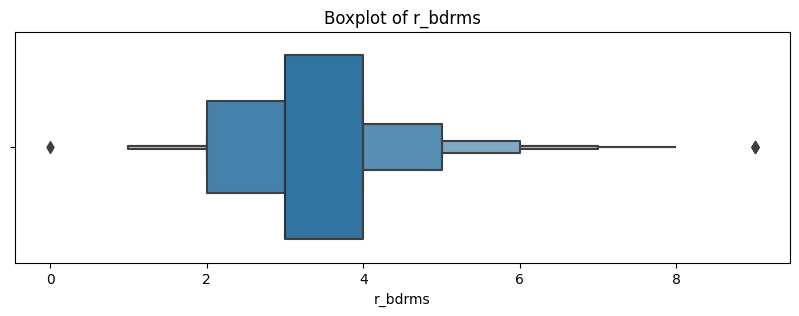

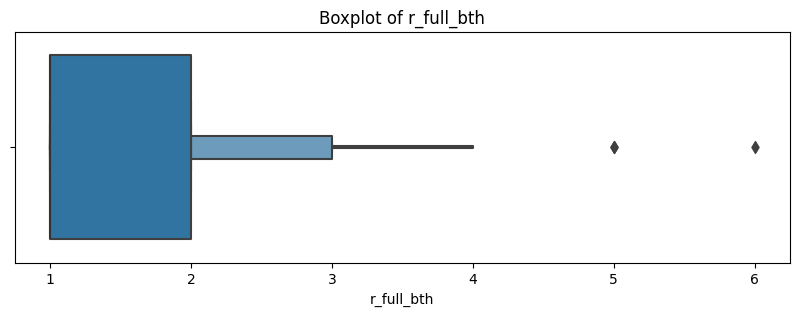

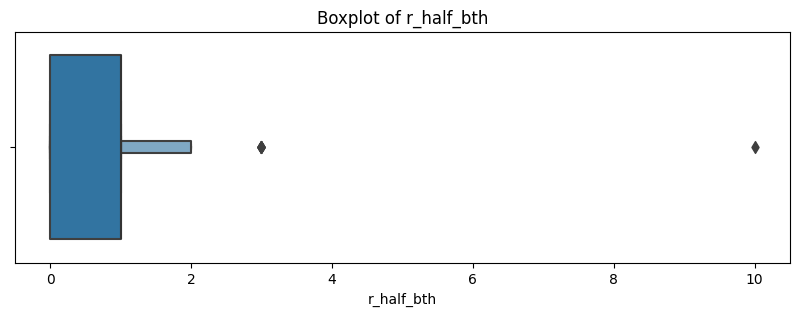

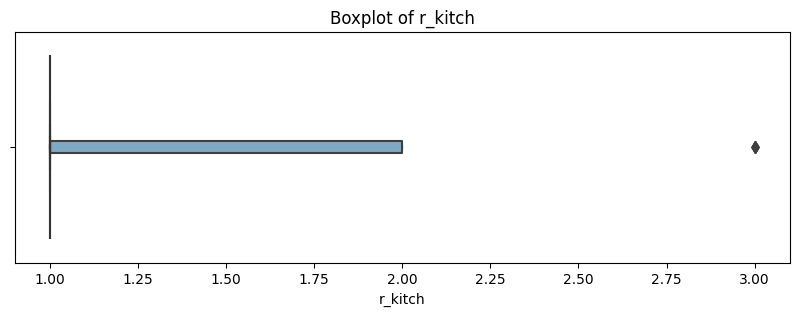

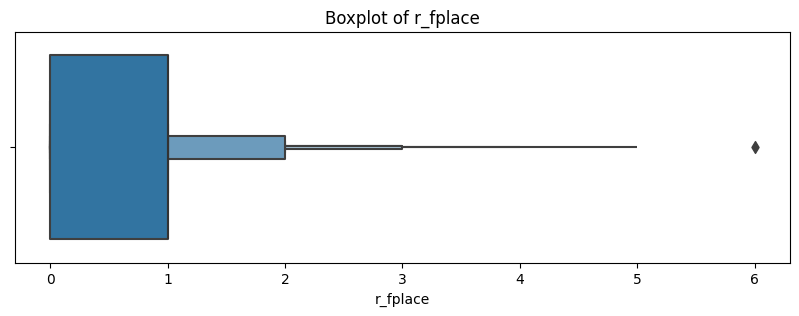

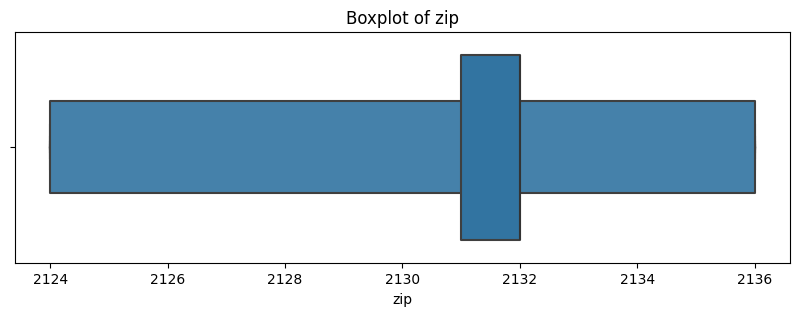

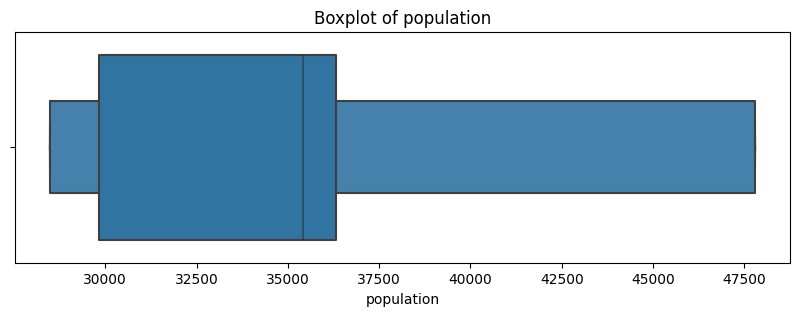

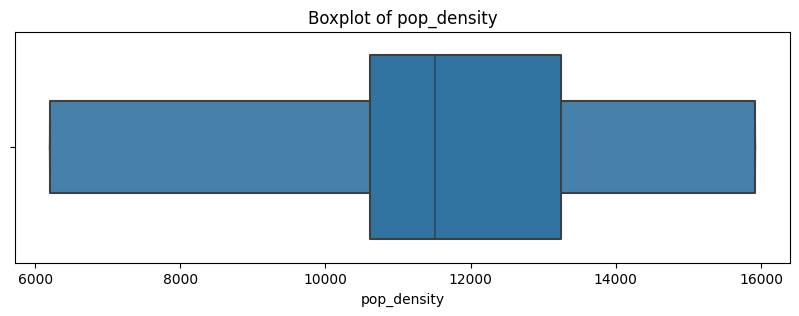

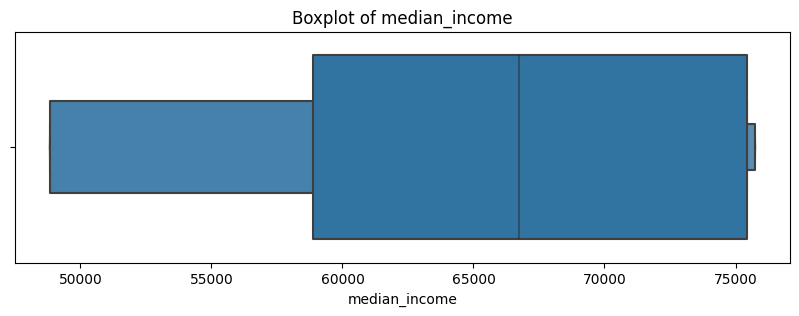

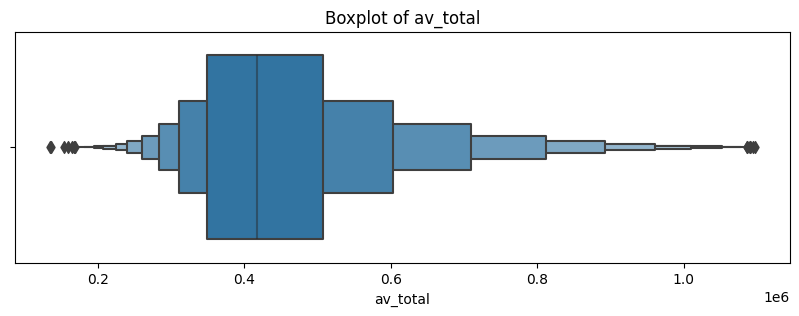

In [ ]:
for feature in numeric_feats:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxenplot(boston,x=feature)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

Box plots of numerical values where it showcases significant cases of outliers in data

In [ ]:
boston[numeric_feats].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
land_sf,14221.0000,5910.2521,2868.8400,0.0000,4305.0000,5291.0000,6731.0000,107158.0000
yr_built,14225.0000,1933.4266,33.6072,0.0000,1910.0000,1931.0000,1955.0000,2016.0000
yr_remod,14225.0000,655.0789,939.1863,0.0000,0.0000,0.0000,1995.0000,2016.0000
living_area,14225.0000,1658.3717,547.5546,332.0000,1300.0000,1552.0000,1906.0000,8623.0000
num_floors,14225.0000,1.7271,0.4471,1.0000,1.5000,2.0000,2.0000,3.0000
r_total_rms,14225.0000,7.0974,1.5546,3.0000,6.0000,7.0000,8.0000,18.0000
r_bdrms,14225.0000,3.3336,0.9184,0.0000,3.0000,3.0000,4.0000,9.0000
r_full_bth,14225.0000,1.3437,0.5577,1.0000,1.0000,1.0000,2.0000,6.0000
r_half_bth,14225.0000,0.5653,0.5427,0.0000,0.0000,1.0000,1.0000,10.0000
r_kitch,14225.0000,1.0176,0.1330,1.0000,1.0000,1.0000,1.0000,3.0000


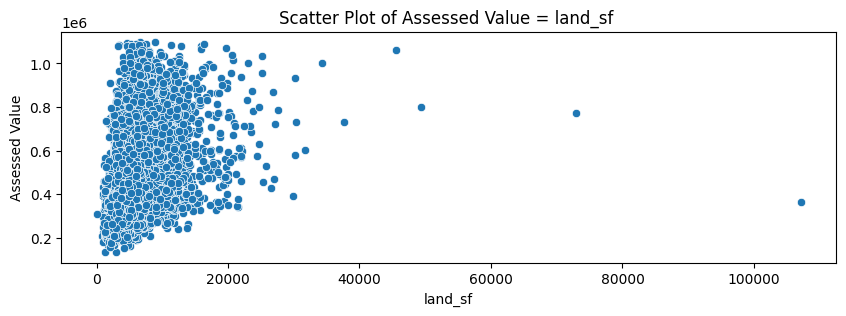

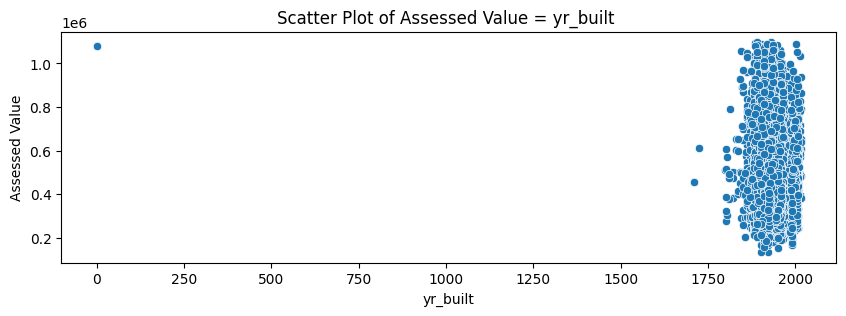

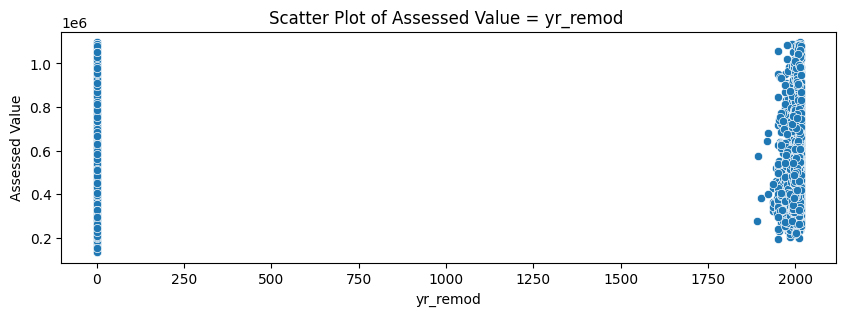

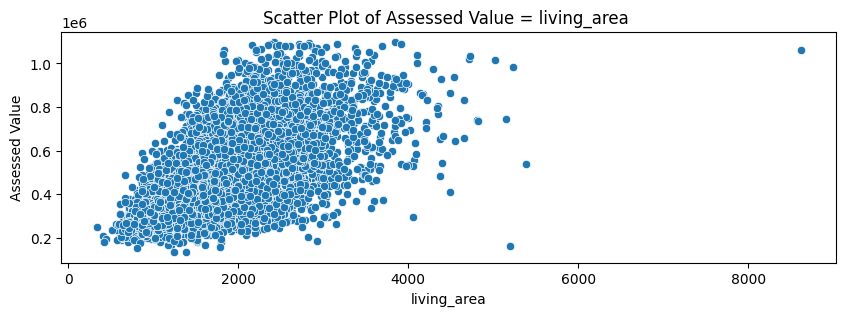

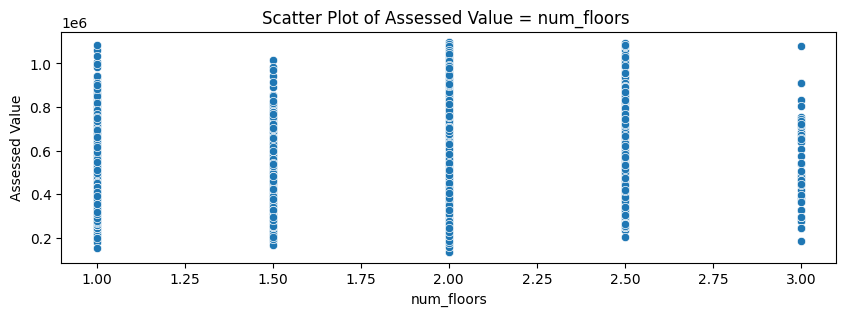

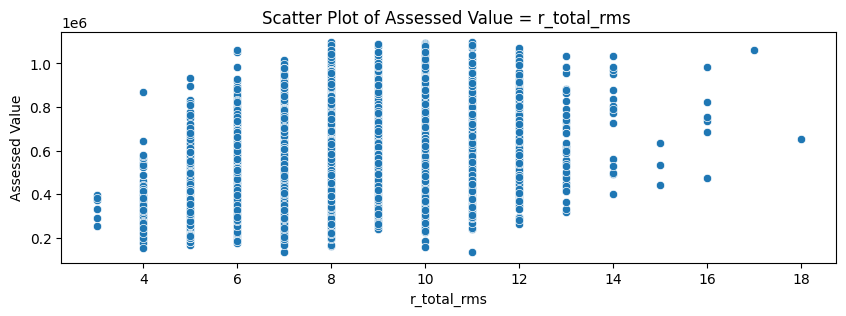

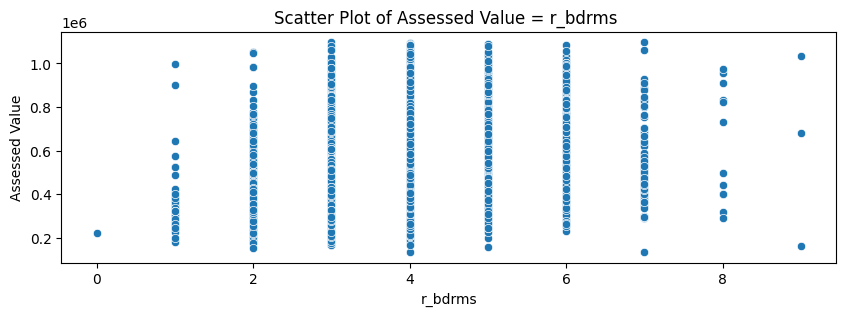

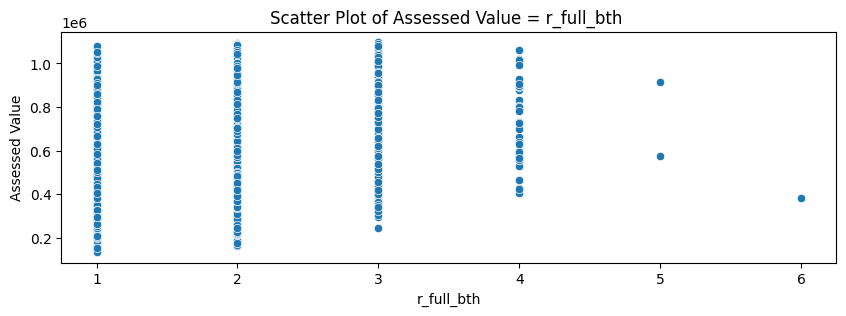

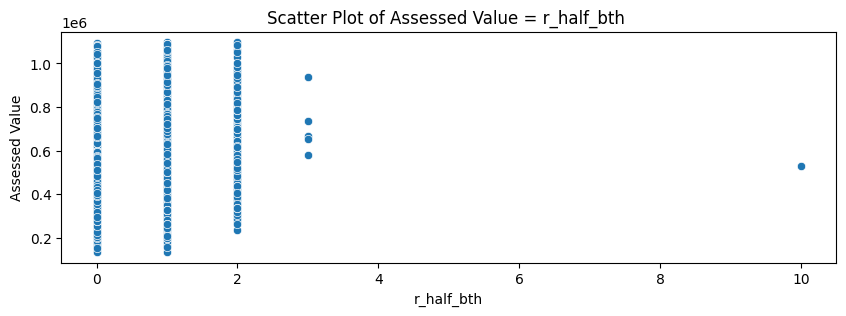

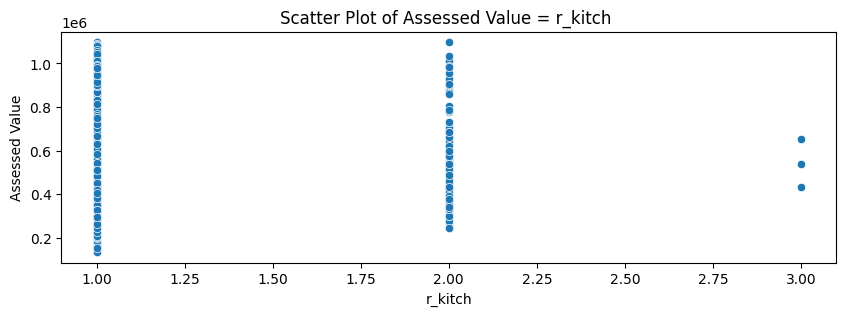

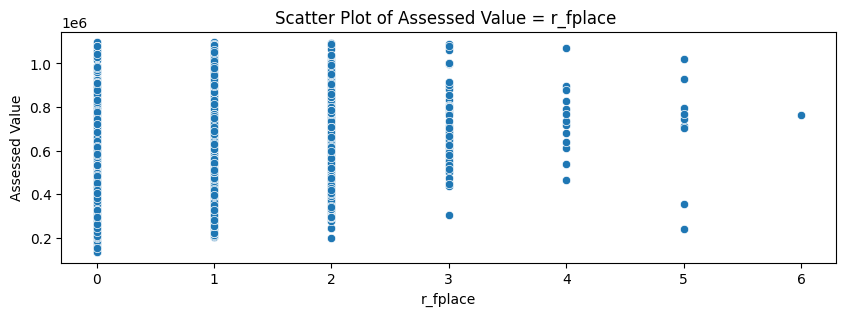

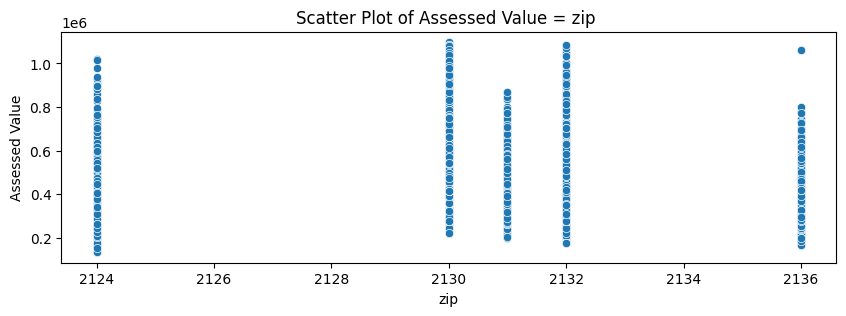

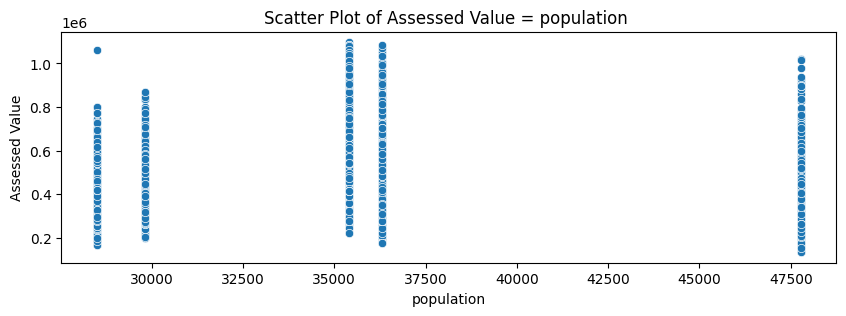

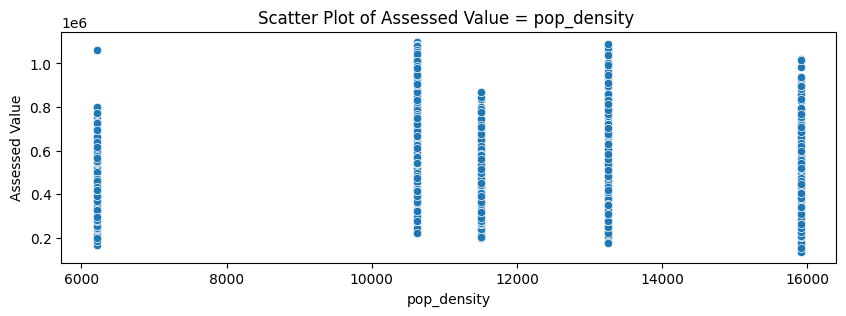

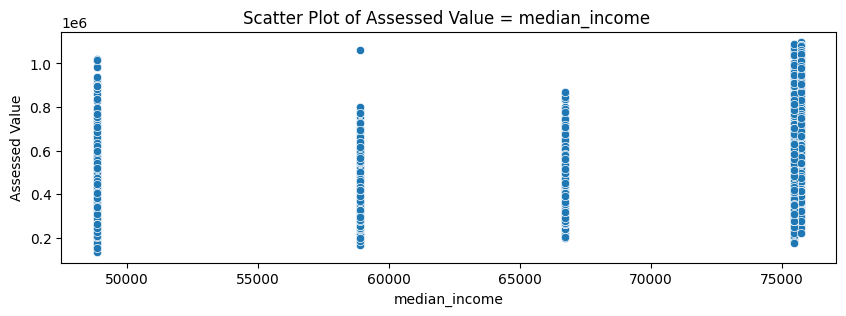

In [ ]:
#understand relationship between features and target var

for feature in numeric_feats:
  if feature != 'av_total': # not include target var: av_total
    plt.figure(figsize=(10, 3))
    sns.scatterplot(boston,x=feature, y='av_total')
    # if you want a linear line
    # sns.regplot(wake,x=feature, y='sale_price', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot of Assessed Value = {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Assessed Value')
    # Display the plot
    plt.show()

Scatter plots of variables to assessed value, most data lacks linearity

In [ ]:
#identify correlation
# Compute the correlation of each variable with the target
correlations = boston[numeric_feats].apply(lambda x: x.corr(boston['av_total']))
df_correlations = correlations.to_frame(name='correlation')
#df_correlations.columns = ['feature', 'correlation']
df_correlations = df_correlations.sort_values('correlation', ascending=False)
df_correlations


,correlation
av_total,1.0000
living_area,0.6403
r_total_rms,0.4585
median_income,0.4297
r_full_bth,0.3737
r_fplace,0.3631
land_sf,0.3452
r_bdrms,0.3451
num_floors,0.3445
r_half_bth,0.2751


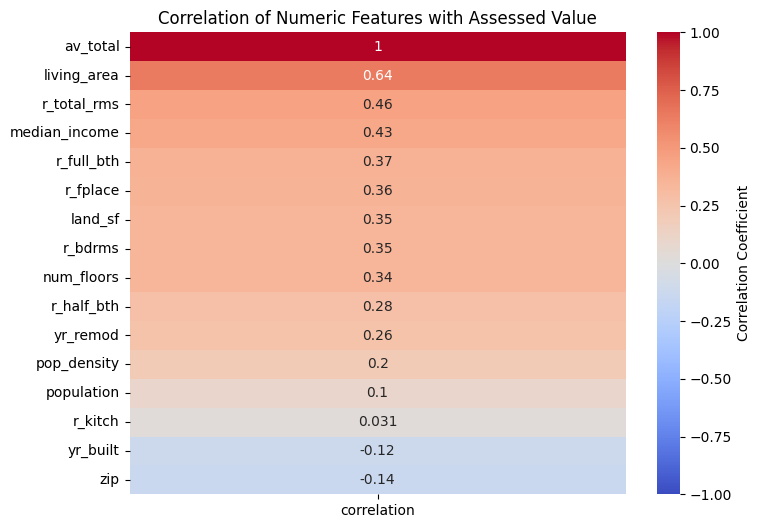

In [ ]:
#create heatmap correlation to see correlation better
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Numeric Features with Assessed Value')
plt.show()

Correlation heat map, living area is on top with no other variable coming close.

Identify Catagorical Features

In [ ]:
categorical_columns = boston.select_dtypes(include=['object']).columns
categorical_columns

Index(['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state'],
      dtype='object')

In [ ]:
cat_feats = ['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state']

own_occ
Y    12516
N     1709
Name: own_occ, dtype: int64


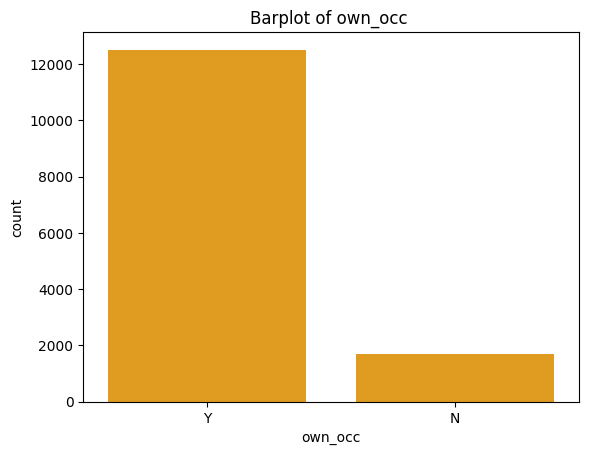

structure_class
R    14225
Name: structure_class, dtype: int64


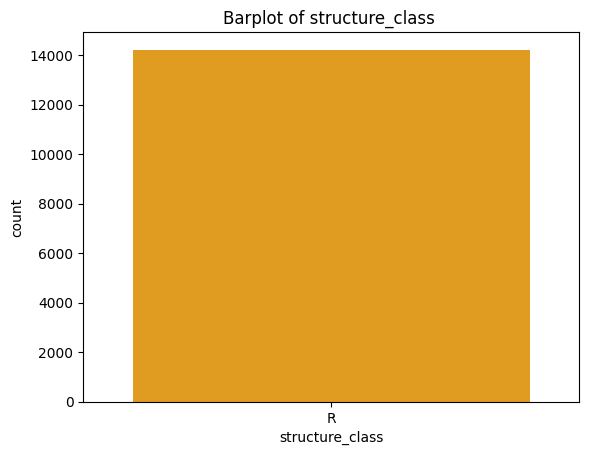

r_bldg_styl
CL    8545
CP    2333
RN    1022
BW     677
RR     545
CV     455
SD     186
VT     119
SL     116
RM      72
RE      69
TD      35
CN      27
TL      19
BL       2
OT       2
DK       1
Name: r_bldg_styl, dtype: int64


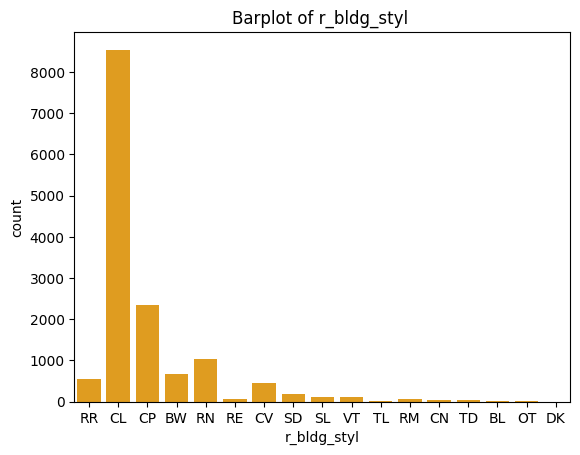

r_roof_typ
G    11244
H     1896
L      737
M      162
S      131
F       54
O        1
Name: r_roof_typ, dtype: int64


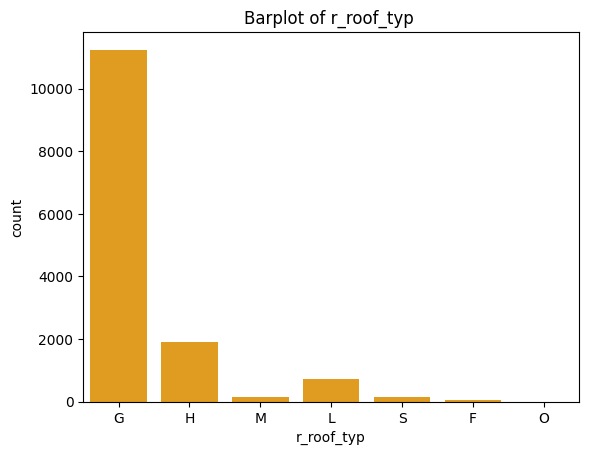

r_ext_fin
M    7758
W    3945
F    1069
A     618
B     379
S     172
C      95
U      87
P      55
V      46
G       1
Name: r_ext_fin, dtype: int64


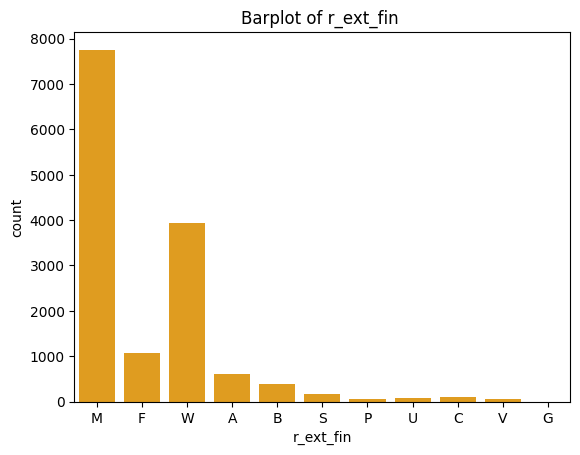

r_bth_style
S    9322
M    3961
N     909
L      33
Name: r_bth_style, dtype: int64


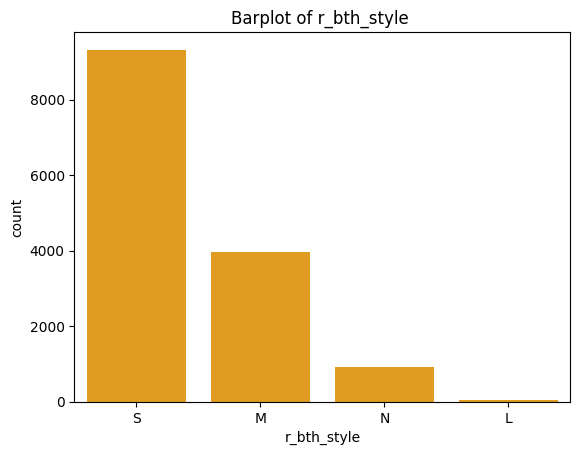

r_kitch_style
S    8370
M    4883
N     910
L      62
Name: r_kitch_style, dtype: int64


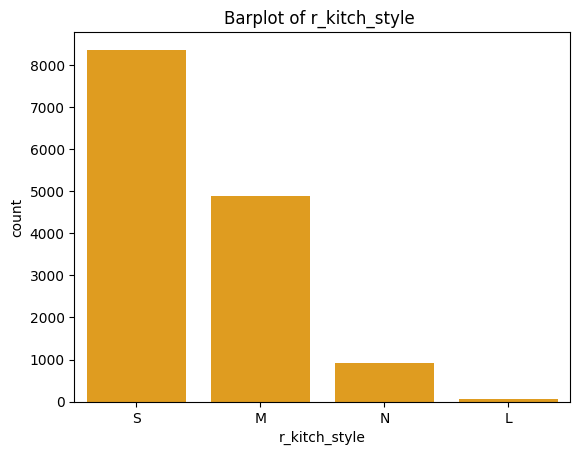

r_heat_typ
W    10416
F     3560
E      175
P       41
N       18
O       11
S        4
Name: r_heat_typ, dtype: int64


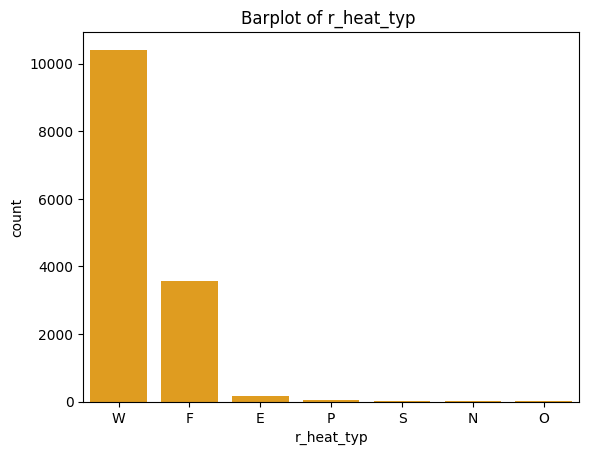

r_ac
N    11810
C     2355
D       60
Name: r_ac, dtype: int64


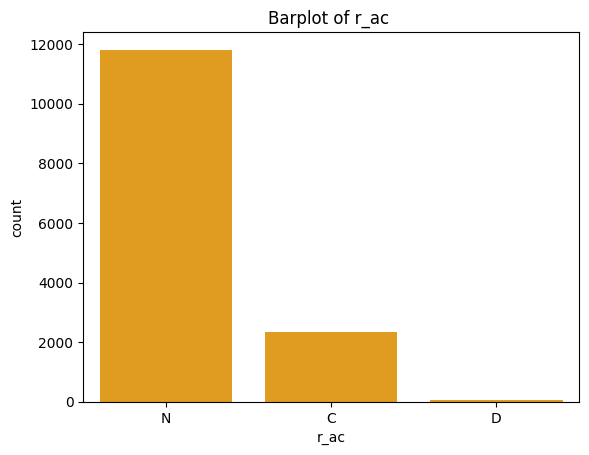

r_ext_cnd
A    11543
G     2315
F      352
P       13
E        2
Name: r_ext_cnd, dtype: int64


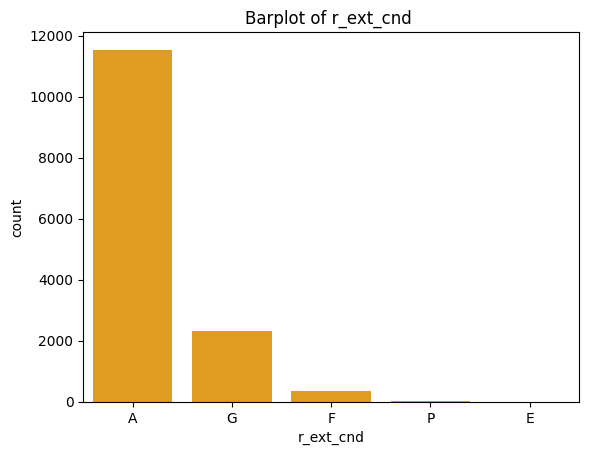

r_ovrall_cnd
A    11744
G     2357
F      114
P        9
E        1
Name: r_ovrall_cnd, dtype: int64


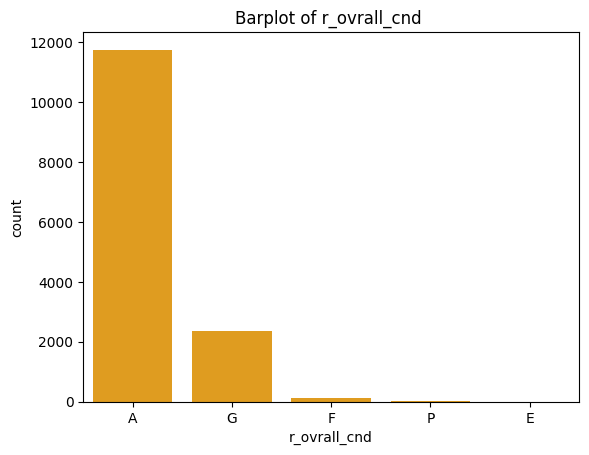

r_int_cnd
A    10176
G     3834
F      188
E       16
P       11
Name: r_int_cnd, dtype: int64


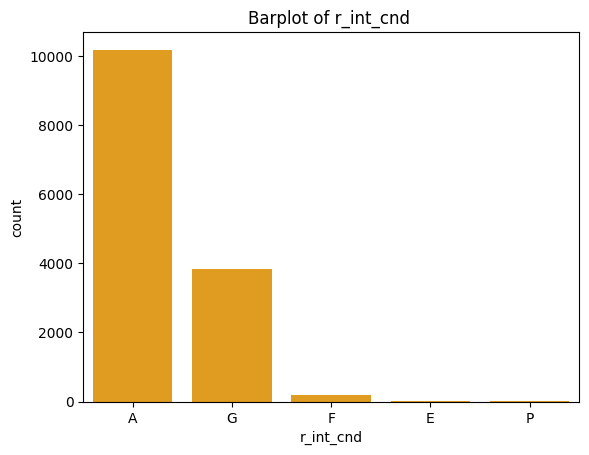

r_int_fin
N    14216
E        7
S        2
Name: r_int_fin, dtype: int64


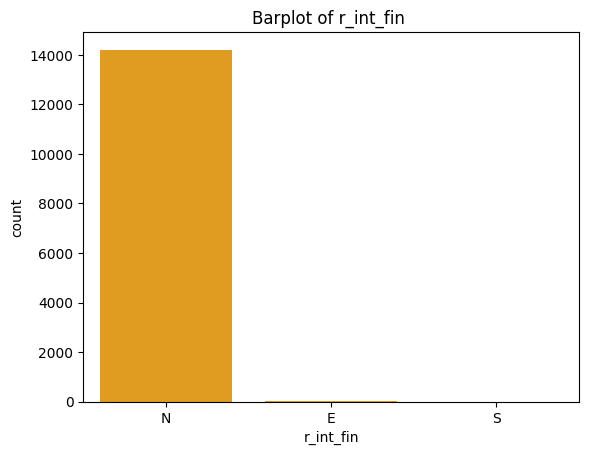

r_view
A    13357
G      445
F      384
P       24
E       15
Name: r_view, dtype: int64


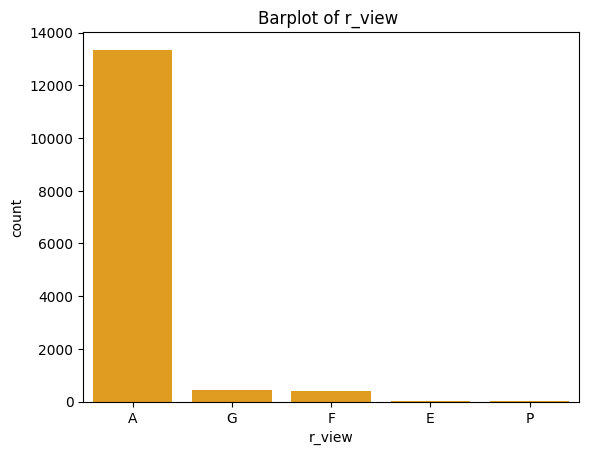

city_state
Cambridge, MA            4792
Hyde Park, MA            3464
Roslindale, MA           2525
Dorchester Center, MA    2124
Jamaica Plain, MA        1320
Name: city_state, dtype: int64


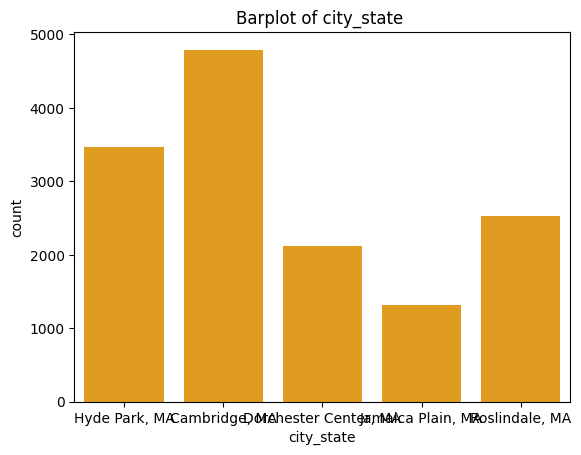

In [ ]:
for i in cat_feats:
  print(i)
  print(boston[i].value_counts())
  plt.title(f'Barplot of {i} ')
  sns.countplot(data=boston, x=i, color ="orange")
  plt.show()


Catagorical variable counplots

Findings: all residential structural class

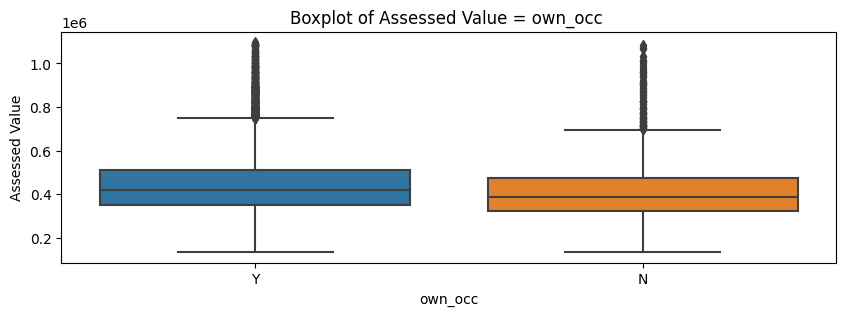

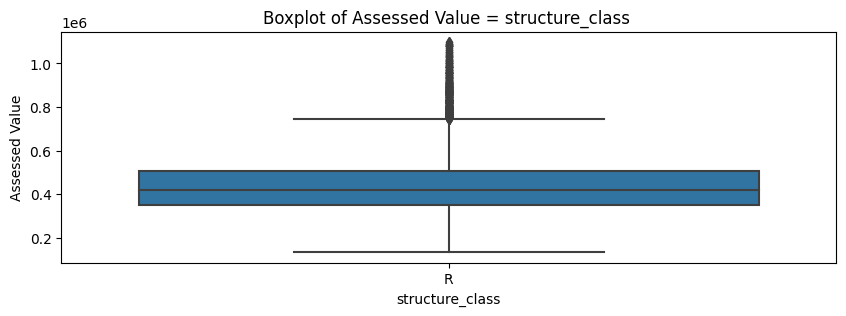

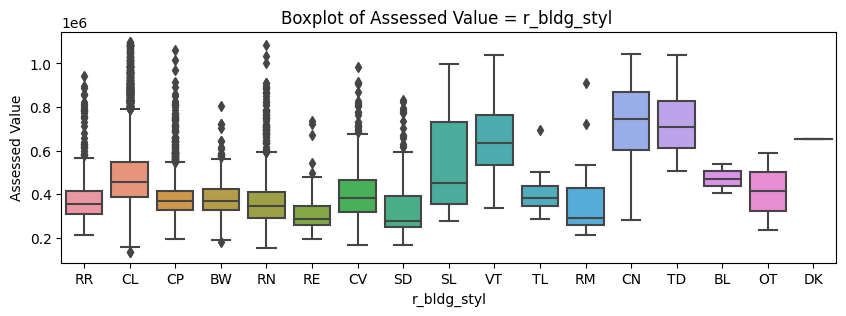

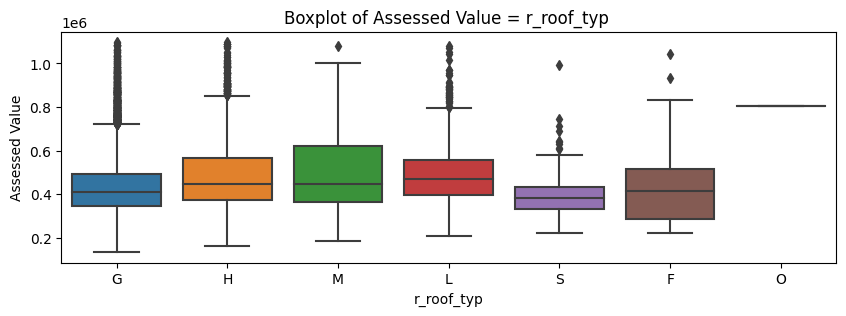

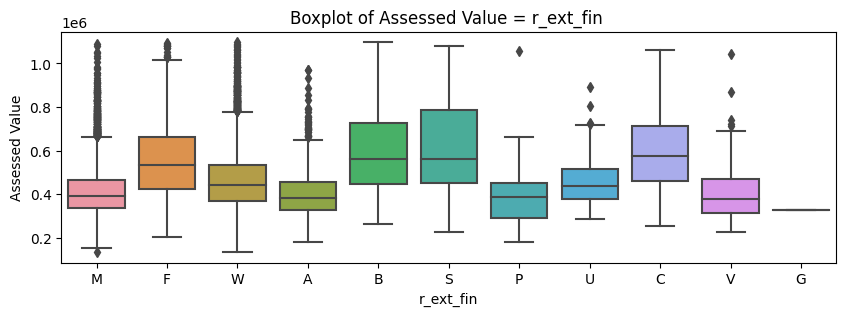

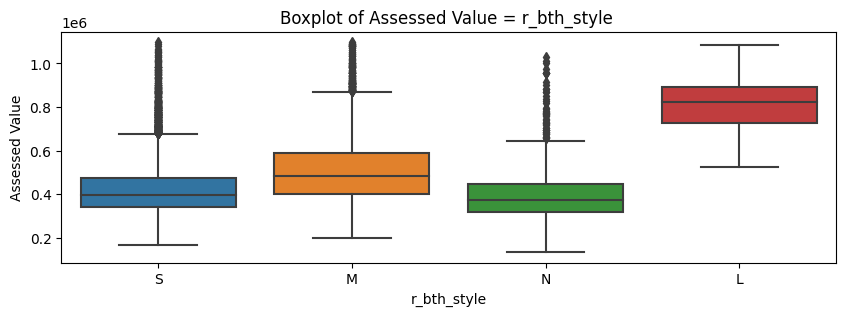

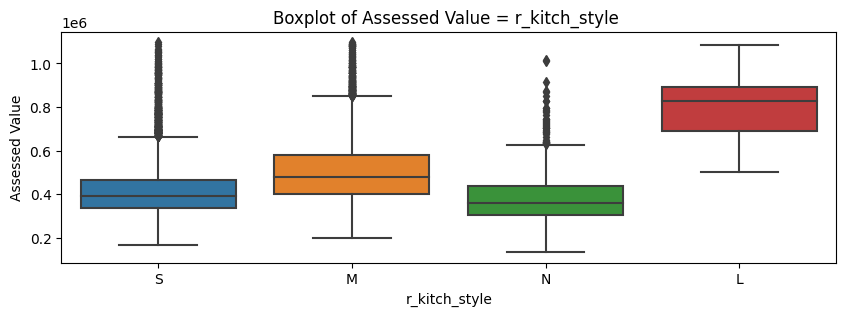

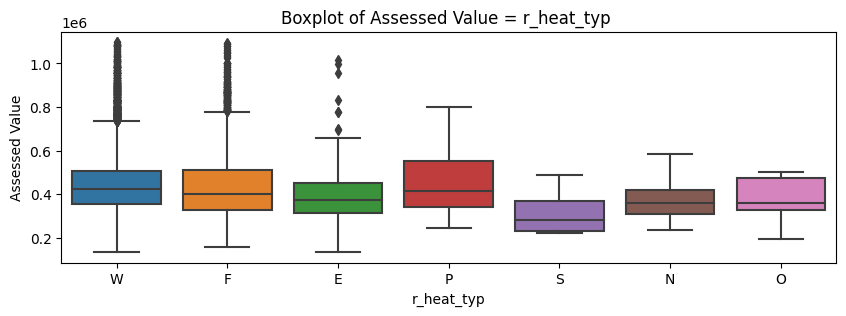

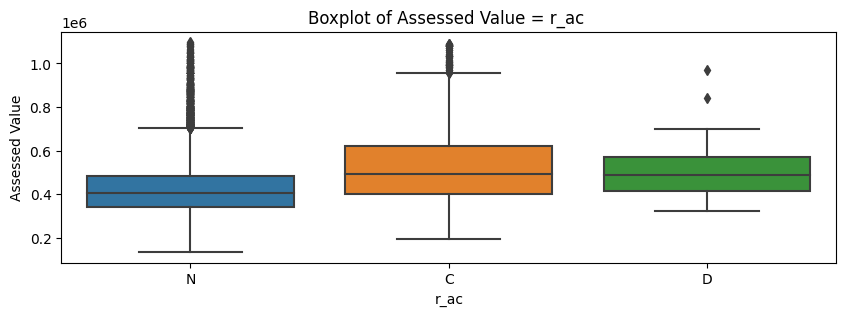

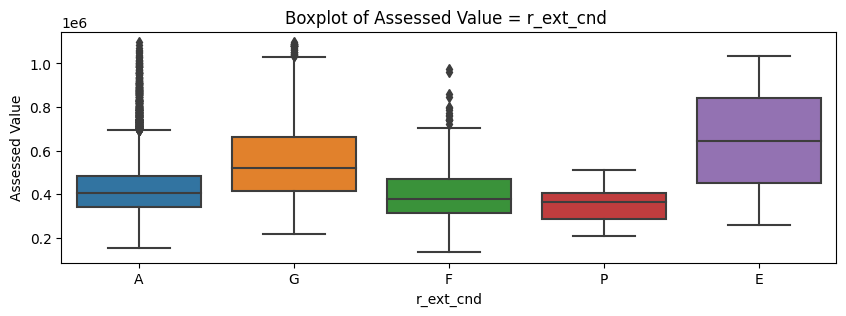

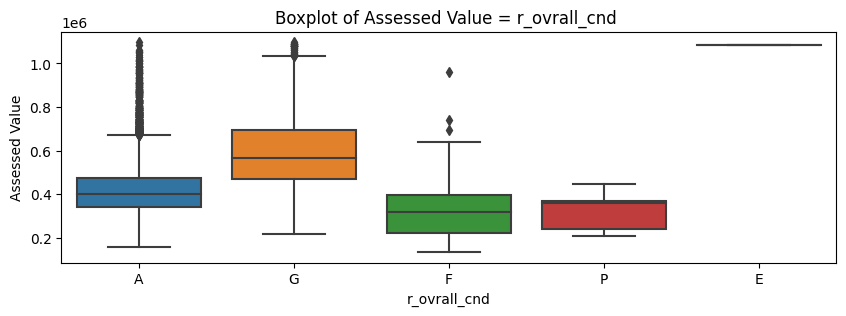

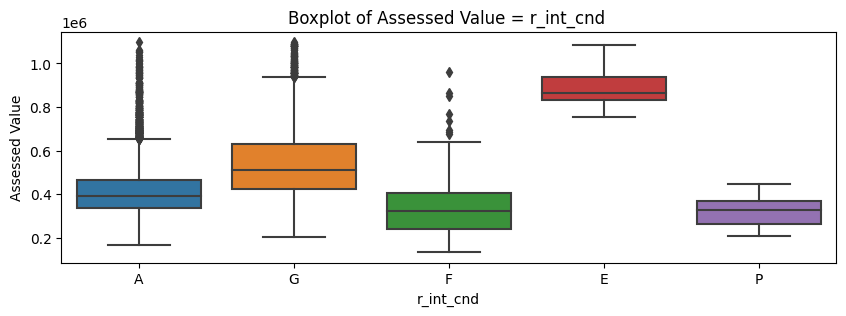

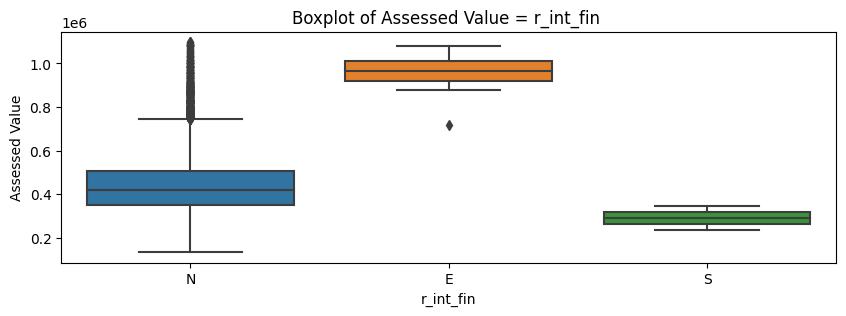

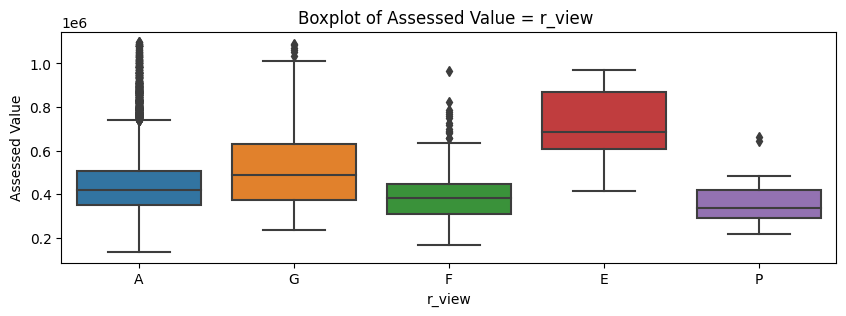

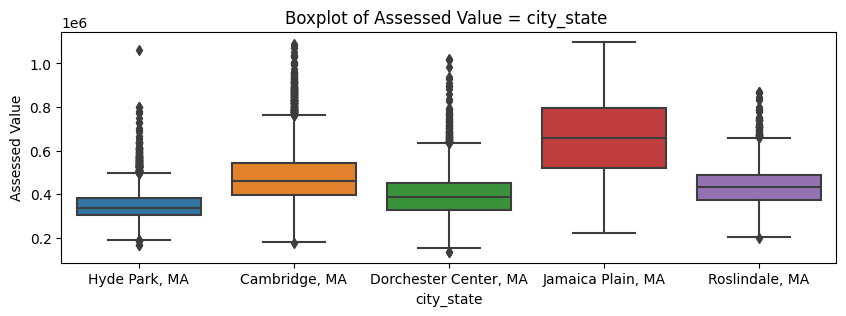

In [ ]:
for i in cat_feats:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxplot(boston,x=i, y='av_total')
  plt.title(f'Boxplot of Assessed Value = {i} ')
  plt.xlabel(i)
  plt.ylabel('Assessed Value')
  # Display the plot
  plt.show()

Categorical box plots to assessed value

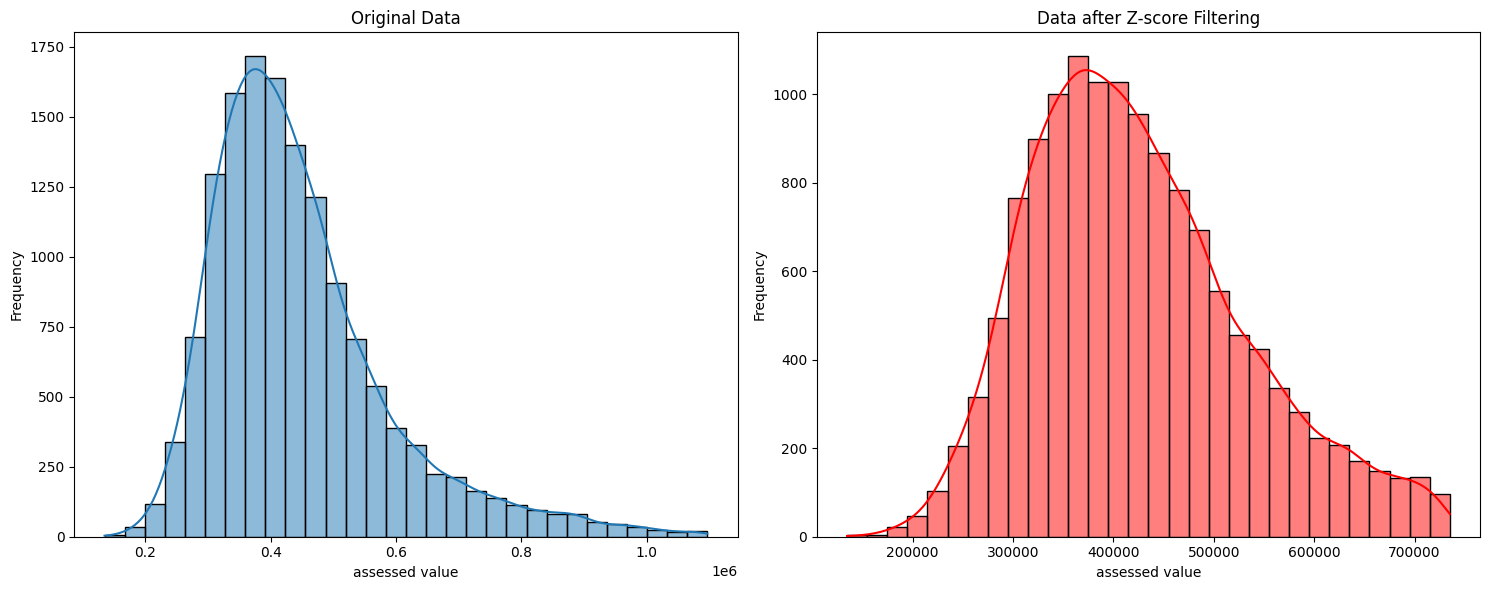

In [ ]:
from scipy.stats import zscore
# Calculate Z-scores
z_scores = zscore(boston['av_total'])
# Get boolean array indicating the presence of outliers
# Here, we consider data points with Z-scores > 2 or < -2 as outliers
outliers = np.where((z_scores > 2) | (z_scores < -2))
# Filter out the outliers
filtered_data = boston[~(z_scores > 2) | (z_scores < -2)]
# Plotting original data and filtered data
plt.figure(figsize=(15, 6))
# Original Data
plt.subplot(1, 2, 1)
sns.histplot(boston['av_total'], kde=True, bins=30)
plt.title('Original Data')
plt.xlabel('assessed value')
plt.ylabel('Frequency')
# Filtered Data
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['av_total'], kde=True, bins=30, color='r')
plt.title('Data after Z-score Filtering')
plt.xlabel('assessed value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
#identify outliers
#then run analysis w o outliers


Initally a slight be skewed right to now being normal

## ASSESSING MODEL ONE

In [ ]:
boston.dropna(inplace=True)


In [ ]:
merge_m1 = pd.merge(boston, pred1, on= 'pid')

In [ ]:
merge_m1.head()

,pid,zipcode,own_occ,land_sf,yr_built,yr_remod,living_area,num_floors,structure_class,r_bldg_styl,...,r_int_cnd,r_int_fin,r_view,zip,population,pop_density,median_income,city_state,av_total,pred
0,10,2136,Y,10288.0000,1992,0.0000,1681,1.0000,R,RR,...,A,N,A,2136,28488,6207,58890,"Hyde Park, MA",321200.0000,492976.2739
1,20,2132,Y,10148.0000,1900,2016.0000,3024,2.5000,R,CL,...,G,N,G,2132,36314,13251,75446,"Cambridge, MA",845475.9346,696277.0579
2,30,2132,Y,8512.0000,1920,0.0000,1160,2.0000,R,CL,...,A,N,A,2132,36314,13251,75446,"Cambridge, MA",401230.0313,393368.8548
3,40,2124,Y,3187.0000,1900,2001.0000,1868,2.0000,R,CL,...,A,N,F,2124,47783,15913,48841,"Dorchester Center, MA",450500.0000,458700.8346
4,50,2136,Y,10088.0000,1971,1975.0000,1534,1.0000,R,RR,...,A,N,G,2136,28488,6207,58890,"Hyde Park, MA",368094.7401,467320.9977


In [ ]:
merge_m1['residual_error'] = merge_m1['av_total'] - merge_m1['pred']

In [ ]:
merge_m1[['av_total','pred','residual_error']].head()

,av_total,pred,residual_error
0,321200.0000,492976.2739,-171776.2739
1,845475.9346,696277.0579,149198.8767
2,401230.0313,393368.8548,7861.1765
3,450500.0000,458700.8346,-8200.8346
4,368094.7401,467320.9977,-99226.2576


In [ ]:
# calculate stats
y = merge_m1['av_total']
reg_prediction = merge_m1['pred']
r2 = r2_score(y, reg_prediction)
mse = mean_squared_error(y, reg_prediction)
mae = mean_absolute_error(y, reg_prediction)

print("-- Linear Regression Stats for Model One -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the assessed value can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual assessed value")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")


-- Linear Regression Stats for Model One -- 
R-Square: 0.438
 - RSQUARE: approximately 43.8% of the variability in the assessed value can be explained by our model.
Root Mean Squared Error: 107,918.45
 - RMSE: on average, our predictions are approximately $107,918.45 away from the actual assessed value
Mean Absolute Error: 77,530.40
 - MAE:  on average, the predictions made by the model are off by +/- $77,530.40 from the actual


## ASSESSING MODEL TWO

In [ ]:
merge_m2 = pd.merge(boston, pred2, on= 'pid')
merge_m2.head()

,pid,zipcode,own_occ,land_sf,yr_built,yr_remod,living_area,num_floors,structure_class,r_bldg_styl,...,r_int_cnd,r_int_fin,r_view,zip,population,pop_density,median_income,city_state,av_total,pred
0,10,2136,Y,10288.0000,1992,0.0000,1681,1.0000,R,RR,...,A,N,A,2136,28488,6207,58890,"Hyde Park, MA",321200.0000,318559.3750
1,20,2132,Y,10148.0000,1900,2016.0000,3024,2.5000,R,CL,...,G,N,G,2132,36314,13251,75446,"Cambridge, MA",845475.9346,828821.6250
2,30,2132,Y,8512.0000,1920,0.0000,1160,2.0000,R,CL,...,A,N,A,2132,36314,13251,75446,"Cambridge, MA",401230.0313,411252.3125
3,40,2124,Y,3187.0000,1900,2001.0000,1868,2.0000,R,CL,...,A,N,F,2124,47783,15913,48841,"Dorchester Center, MA",450500.0000,432201.1875
4,50,2136,Y,10088.0000,1971,1975.0000,1534,1.0000,R,RR,...,A,N,G,2136,28488,6207,58890,"Hyde Park, MA",368094.7401,366862.2500


In [ ]:
merge_m2['residual_error'] = merge_m2['av_total'] - merge_m2['pred']

In [ ]:
merge_m2[['av_total','pred','residual_error']].head()

,av_total,pred,residual_error
0,321200.0000,318559.3750,2640.6250
1,845475.9346,828821.6250,16654.3096
2,401230.0313,411252.3125,-10022.2812
3,450500.0000,432201.1875,18298.8125
4,368094.7401,366862.2500,1232.4901


In [ ]:
# calculate stats
target = merge_m2['av_total']
reg_pred = merge_m2['pred']
r2 = r2_score(target, reg_pred)
mse = mean_squared_error(target, reg_pred)
mae = mean_absolute_error(target, reg_pred)

print("-- Linear Regression Stats for Model Two -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the assessed value can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual assessed value")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")


-- Linear Regression Stats for Model Two -- 
R-Square: 0.948
 - RSQUARE: approximately 94.8% of the variability in the assessed value can be explained by our model.
Root Mean Squared Error: 32,893.53
 - RMSE: on average, our predictions are approximately $32,893.53 away from the actual assessed value
Mean Absolute Error: 23,475.54
 - MAE:  on average, the predictions made by the model are off by +/- $23,475.54 from the actual


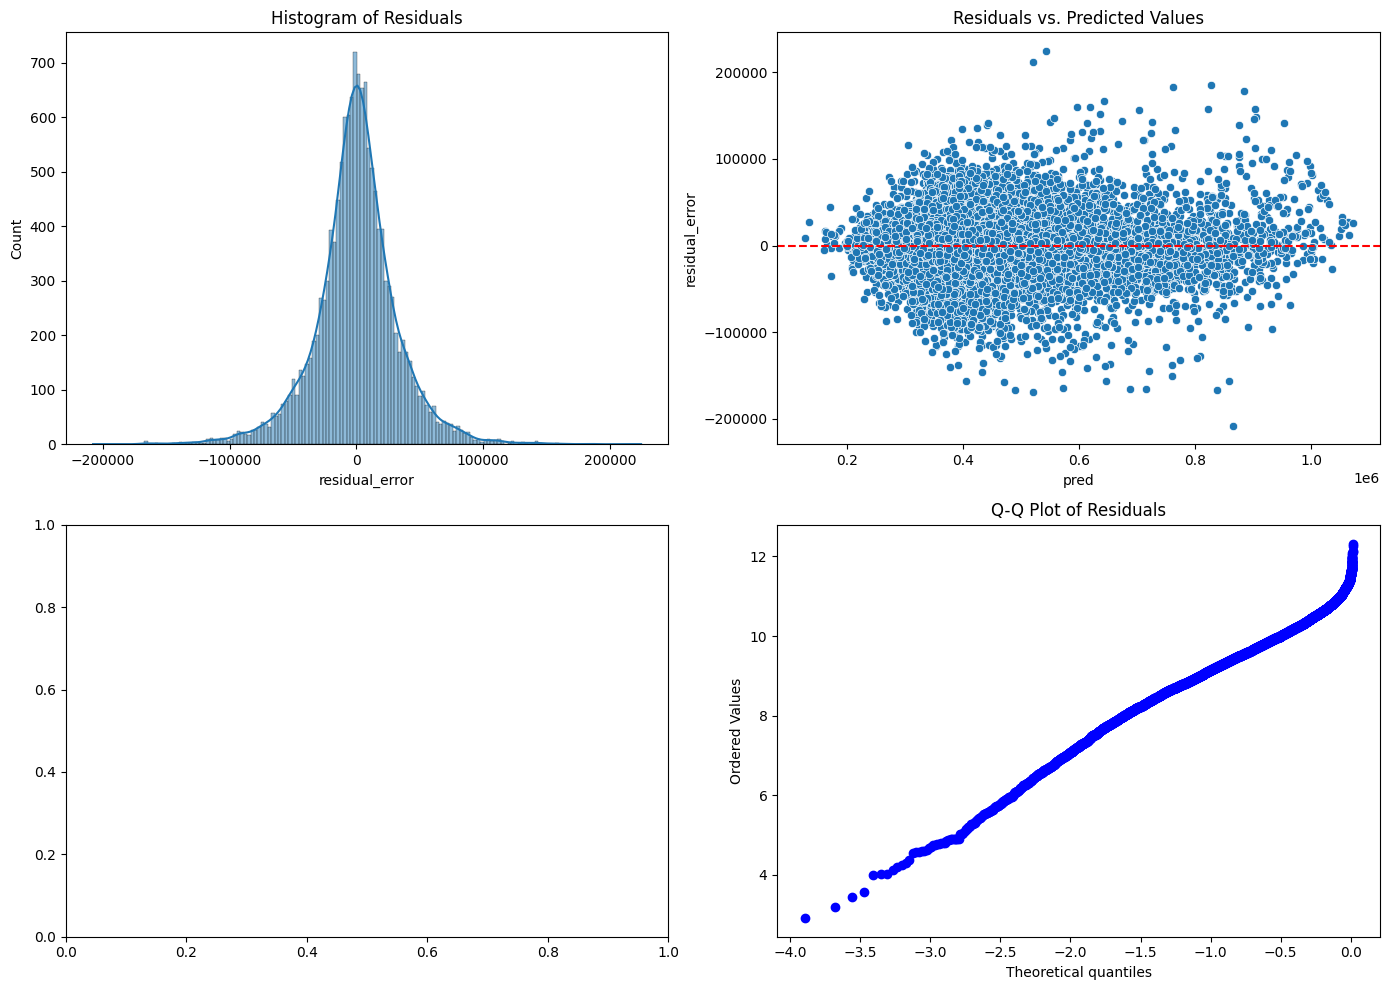

In [ ]:

import scipy.stats as stats

# Set up a 2x2 grid for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histogram of residuals
sns.histplot(merge_m2['residual_error'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Residuals')

# Scatter plot of predicted values vs. residuals
sns.scatterplot(data=merge_m2, x='pred', y='residual_error', ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs. Predicted Values')

# Q-Q plot of residuals
stats.probplot(np.log(merge_m2['residual_error']), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()



# Top 10 overestimates

In [ ]:
over_estimate = merge_m2.nsmallest(10, 'residual_error')
over_estimate['residual_error'].reset_index()

,index,residual_error
0,3890,-207783.0625
1,9237,-168593.0625
2,12242,-167072.0000
3,6850,-166523.1562
4,10630,-165484.3750
5,13404,-165393.4375
6,531,-164599.4375
7,10627,-157096.7812
8,4367,-156959.9688
9,7515,-156799.5000


# Top 10 Underestimate

In [ ]:
under_estimate = merge_m2.nlargest(10, 'residual_error')
under_estimate['residual_error'].reset_index()

,index,residual_error
0,11270,224544.6875
1,652,212404.1250
2,7848,185100.1250
3,5176,183619.3125
4,6047,178668.1875
5,3755,167189.8125
6,1581,160278.0000
7,2625,159653.6250
8,13000,157803.9375
9,13844,157097.6875


## Top Ten Best Estimations

In [ ]:
merge_m2['ab_res'] = merge_m2['residual_error'].abs().round(3)
x = merge_m2.nsmallest(10,'ab_res')
x['ab_res'].reset_index()

,index,ab_res
0,13147,1.5250
1,2131,10.5310
2,47,13.3750
3,2050,15.8880
4,3848,18.5000
5,8448,19.1300
6,11637,21.9400
7,11523,22.2550
8,12648,24.1250
9,9486,25.4930


based on zipcode how much was overesitmated

In [ ]:
m = merge_m2.groupby('zipcode')['av_total'].mean().reset_index()
m['pred'] = merge_m2['pred'].mean()

In [ ]:
m

,zipcode,av_total,pred
0,2124,398385.0657,447290.5003
1,2130,664829.0749,447290.5003
2,2131,437833.2862,447290.5003
3,2132,483842.5324,447290.5003
4,2136,350821.1741,447290.5003


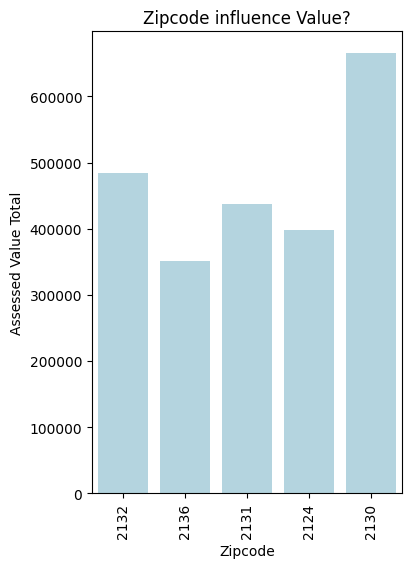

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(data=m,
              x='zipcode',
              y='av_total',
            color='lightblue',
            order=merge_m2['zipcode'].value_counts().index)


plt.title('Zipcode influence Value?')
plt.xlabel('Zipcode')
plt.xticks(rotation=90)
plt.ylabel('Assessed Value Total')
plt.show()

Homes in Jaimaca PLains have a higher assessed value, I wonder what is in Jaimaca Plains that the difference amongst the other zipcodes are pretty large.

In [ ]:
merge_m2['living_area'].max()


8623

In [ ]:
living = [300, 600, 1000, 2000, 2500, 3000, 8000, float('inf')]
area_living_range = ['300-600', '600-1000', '1000-2000', '2000-2500', '2500-3000', '3000-6000', '8000+']

merge_m2['area_living_range'] = pd.cut(merge_m2['living_area'], bins=living, labels=area_living_range, right=False)

merge_m2

,pid,zipcode,own_occ,land_sf,yr_built,yr_remod,living_area,num_floors,structure_class,r_bldg_styl,...,zip,population,pop_density,median_income,city_state,av_total,pred,residual_error,ab_res,area_living_range
0,10,2136,Y,10288.0000,1992,0.0000,1681,1.0000,R,RR,...,2136,28488,6207,58890,"Hyde Park, MA",321200.0000,318559.3750,2640.6250,2640.6250,1000-2000
1,20,2132,Y,10148.0000,1900,2016.0000,3024,2.5000,R,CL,...,2132,36314,13251,75446,"Cambridge, MA",845475.9346,828821.6250,16654.3096,16654.3100,3000-6000
2,30,2132,Y,8512.0000,1920,0.0000,1160,2.0000,R,CL,...,2132,36314,13251,75446,"Cambridge, MA",401230.0313,411252.3125,-10022.2812,10022.2810,1000-2000
3,40,2124,Y,3187.0000,1900,2001.0000,1868,2.0000,R,CL,...,2124,47783,15913,48841,"Dorchester Center, MA",450500.0000,432201.1875,18298.8125,18298.8120,1000-2000
4,50,2136,Y,10088.0000,1971,1975.0000,1534,1.0000,R,RR,...,2136,28488,6207,58890,"Hyde Park, MA",368094.7401,366862.2500,1232.4901,1232.4900,1000-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,142210,2124,Y,3717.0000,1925,1995.0000,1703,2.0000,R,CL,...,2124,47783,15913,48841,"Dorchester Center, MA",380800.0000,372626.2188,8173.7812,8173.7810,1000-2000
14217,142220,2132,Y,3895.0000,1920,2004.0000,1350,2.0000,R,CL,...,2132,36314,13251,75446,"Cambridge, MA",420100.0000,438348.8125,-18248.8125,18248.8120,1000-2000
14218,142230,2132,Y,4700.0000,1928,0.0000,1490,2.0000,R,CL,...,2132,36314,13251,75446,"Cambridge, MA",510200.0000,483708.5312,26491.4688,26491.4690,1000-2000
14219,142240,2124,Y,5250.0000,1925,0.0000,1404,2.0000,R,CL,...,2124,47783,15913,48841,"Dorchester Center, MA",406400.0000,383820.8750,22579.1250,22579.1250,1000-2000


In [ ]:
m = merge_m2.groupby('area_living_range')['av_total'].mean().reset_index()
m.dropna(subset='av_total')

,area_living_range,av_total
0,300-600,228591.2092
1,600-1000,308619.0179
2,1000-2000,418162.2321
3,2000-2500,547739.6106
4,2500-3000,640131.1728
5,3000-6000,715093.4254
6,8000+,1060100.0000


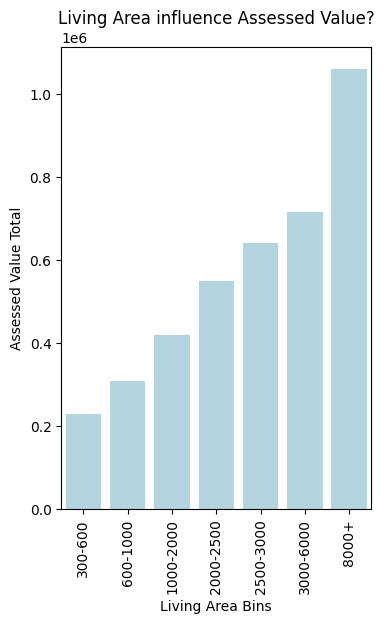

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(data=m,
              x='area_living_range',
              y='av_total',
            color='lightblue')


plt.title('Living Area influence Assessed Value?')
plt.xlabel('Living Area Bins')
plt.xticks(rotation=90)
plt.ylabel('Assessed Value Total')
plt.show()

Homes with higher square footage have a higher assessed value

In [ ]:
y = [0, 1700, 1800, 1900, 1950, 1990, 2000, 2010, float('inf')]
yr_bin = ['0-1700', '1700-1800', '1800-1900', '1900-1950', '1950-1990', '1990-2000', '2000-2010', '2010+']

merge_m2['yr_bin'] = pd.cut(merge_m2['yr_built'], bins=y, labels=yr_bin, right=False)


In [ ]:
merge_m2['yr_bin']

0        1990-2000
1        1900-1950
2        1900-1950
3        1900-1950
4        1950-1990
           ...    
14216    1900-1950
14217    1900-1950
14218    1900-1950
14219    1900-1950
14220    1900-1950
Name: yr_bin, Length: 14221, dtype: category
Categories (8, object): ['0-1700' < '1700-1800' < '1800-1900' < '1900-1950' < '1950-1990' <
                         '1990-2000' < '2000-2010' < '2010+']

In [ ]:
tt = merge_m2.groupby('yr_bin')['av_total'].mean().reset_index()
tt = tt.sort_values(by = 'av_total', ascending = False)
tt

,yr_bin,av_total
0,0-1700,1077500.0000
7,2010+,670915.1800
6,2000-2010,527110.5992
1,1700-1800,526930.4284
2,1800-1900,490999.1883
3,1900-1950,459946.0707
5,1990-2000,435573.1973
4,1950-1990,405286.6241


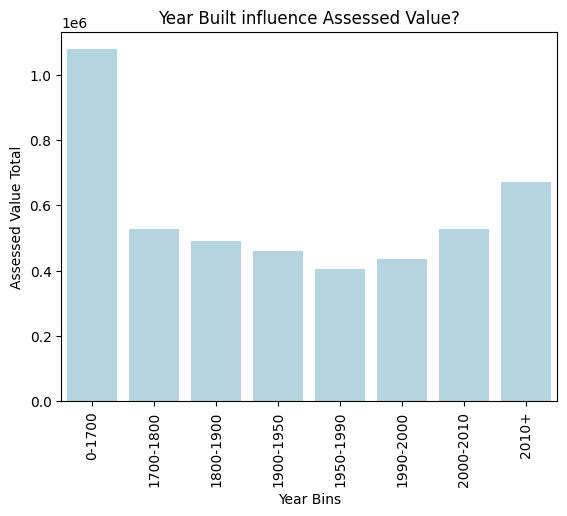

In [ ]:
sns.barplot(data=tt,
              x='yr_bin',
              y='av_total',
            color='lightblue')

plt.title('Year Built influence Assessed Value?')
plt.xlabel('Year Bins')
plt.xticks(rotation=90)
plt.ylabel('Assessed Value Total')
plt.show()

Homes Built in the early 2010s have a higher value. I wish I couldve removed or handled the 0 values and maybe my graph wouldve been more useful.

In [ ]:
rem = [0, 1700, 1800, 1900,2016, float('inf')]
rem_bin = ['0-1700', '1700-1800', '1800-1900', '1900-2000', '2000-2016']

merge_m2['rem_bin'] = pd.cut(merge_m2['yr_remod'], bins=rem, labels=rem_bin, right=False)


In [ ]:
ty = merge_m2.groupby('rem_bin')['av_total'].mean().reset_index()
ty

,rem_bin,av_total
0,0-1700,421424.4597
1,1700-1800,NaN
2,1800-1900,425200.0000
3,1900-2000,499323.1167
4,2000-2016,521333.4395


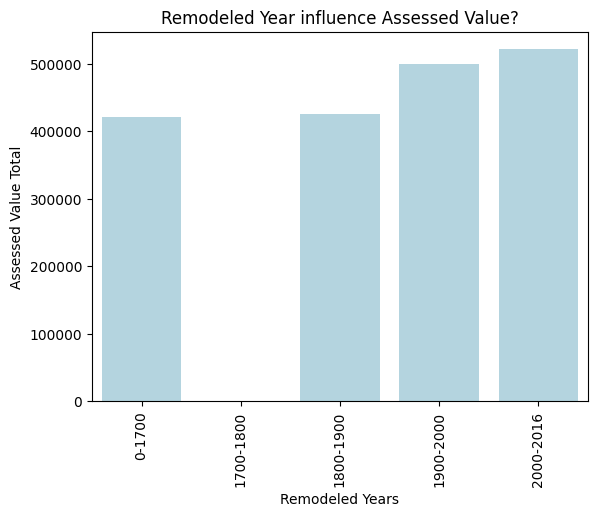

In [ ]:
sns.barplot(data=ty,
              x='rem_bin',
              y='av_total',
            color='lightblue')

plt.title('Remodeled Year influence Assessed Value?')
plt.xlabel('Remodeled Years')
plt.xticks(rotation=90)
plt.ylabel('Assessed Value Total')
plt.show()

Homes remodeled at an earlier year are valued higher

In [ ]:
%%shell
jupyter nbconvert --to html  "/content/drive/MyDrive/BostonHousePrices_SantiagoGatica_Estefani.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/BostonHousePrices_SantiagoGatica_Estefani.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equiva

CalledProcessError: Command 'jupyter nbconvert --to html  "/content/drive/MyDrive/BostonHousePrices_SantiagoGatica_Estefani.ipynb"
' returned non-zero exit status 255.